<a href="https://colab.research.google.com/github/Samrudhig/DS-Colab-Stuff/blob/main/SAMRUDHI_GARI__Module_6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6 Assignment
BY SAMRUDHI GARI
11687267

You've been asked to clean and explore a dataset containing employee ratings  for months of review cycles.

Enter your student id, in the next cell, when asked and then run the next two cells. The second cell will create the dataset you will be working on. If you run the second cell again, it will generate a new dataset so be aware.

### Generate Seed and Data

In [ ]:
# create seed, run this cell as is, do not edit
import random

# provide your student id as stud_id, replace 123456789 (automatice 0 if not replaced with your student id)
stud_id = 11687267
my_seed = random.seed(stud_id)

In [ ]:
# run this cell as is, do not edit
import pandas as pd
import numpy as np
import re
import random
import urllib.request
from sklearn.datasets import make_regression


def make_null(r, w):
    rtn = random.choices([np.nan, r], weights=[w, 100-w])
    return re.sub(r"[\[\]]",'', str(rtn))

words = []

# "https://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"
url = 'https://raw.githubusercontent.com/gitmystuff/Datasets/main/words.txt'

for word in urllib.request.urlopen(url):
    words.append(word.decode('utf-8').replace('\n', ''))

capitalized = [word for word in words if word[0].isupper()]
proper_names  = [word for word in capitalized if not word.isupper()]

variables = []
for n in range(20):
    variables.append(' '.join([proper_names[random.randint(0, len(proper_names))] for i in range(2)]))

print(variables)

X, y = make_regression(n_samples=100, n_features=10, n_informative=6)
random.shuffle(variables)
cols = variables[:10]
df = pd.DataFrame(data=X, columns=cols)
df[cols[0]] = round(df[cols[0]], 4)
df[variables[10]] = 0.03
df[variables[11]] = 0.07
df[variables[12]] = df[variables[0]]
df[variables[13]] = df[cols[1]]
df[variables[10]] = df[variables[10]].apply(make_null, args=(2,))
df[variables[13]] = df[variables[13]].apply(make_null, args=(5,))
df[variables[14]] = random.sample(range(100, 1000), k=100)
df[variables[15]] = random.sample(range(1000, 10000), k=100)

df[variables[7]] = df[variables[7]].apply(lambda r: abs(r) if (r < -0.02) else r)
df[variables[8]] = df[variables[8]].apply(lambda r: abs(r)*-1 if (r > 0.01) else r)
df[variables[9]] = df[variables[9]].apply(lambda r: abs(r) if (r < -0.01) else r)
df[variables[7]] = df[variables[7]].apply(make_null, args=(7,))
df[variables[8]] = df[variables[8]].apply(make_null, args=(8,))
df[variables[9]] = df[variables[9]].apply(make_null, args=(9,))

df = df[np.random.default_rng(seed=my_seed).permutation(df.columns.values)]

cats = [random.choice(['blue', 'white']) for i in range(100)]
df['Collar'] = cats
cats = [random.choice(['opt in', 'opt out']) for i in range(100)]
df['401K'] = cats
cats = [random.choice(['medical plan 1', 'medical plan 2', 'medical plan 3']) for i in range(100)]
df['Medical'] = cats
cats = [random.choice(['5 stars', '4 stars', '3 stars', '2 stars', '1 star']) for i in range(100)]
df['Stars'] = cats

df['Total Sales'] = y

dupes = df.loc[0:5]
df = pd.concat([df, dupes], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

df.to_csv('Amt06.csv', index=False) # comment this out after successful run so that you don't overwrite your data

['Quito Reuben', 'McKesson Minsk', 'Segundo Sandusky', 'Burgundy Ottawa', 'Nashua Mouton', 'Qatar Rankine', 'Getty Knox', 'Hummel Dominic', 'McFarland Kalamazoo', 'Han Hattiesburg', 'Dylan Judy', 'Sofia Istanbul', 'Huggins Guelph', 'Mr Samuelson', 'Baghdad Greenland', 'Braille Rutherford', 'Fallopian Pitt', 'Farrell Ogden', 'Saturnalia Shanghai', 'Kalamazoo Patricia']


### Data Prep

In [ ]:
# create dataframe from Assgn 6.csv and print shape, info(), and head()
import pandas as pd
import numpy as np

AmtSix =  pd.read_csv("Amt06.csv")
print("data frame shape:")
print(AmtSix.shape)
print("Info:")
print(AmtSix.info())
print("Head:")
AmtSix.head()


data frame shape:
(106, 21)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Han Hattiesburg      100 non-null    float64
 1   Burgundy Ottawa      106 non-null    int64  
 2   Saturnalia Shanghai  106 non-null    float64
 3   Fallopian Pitt       103 non-null    float64
 4   McKesson Minsk       101 non-null    float64
 5   Dylan Judy           106 non-null    float64
 6   Huggins Guelph       97 non-null     float64
 7   Nashua Mouton        106 non-null    float64
 8   Farrell Ogden        106 non-null    float64
 9   Kalamazoo Patricia   103 non-null    float64
 10  Braille Rutherford   106 non-null    float64
 11  Hummel Dominic       106 non-null    float64
 12  Sofia Istanbul       106 non-null    float64
 13  Mr Samuelson         106 non-null    int64  
 14  McFarland Kalamazoo  106 non-null    float64
 15  Segund

,Han Hattiesburg,Burgundy Ottawa,Saturnalia Shanghai,Fallopian Pitt,McKesson Minsk,Dylan Judy,Huggins Guelph,Nashua Mouton,Farrell Ogden,Kalamazoo Patricia,...,Hummel Dominic,Sofia Istanbul,Mr Samuelson,McFarland Kalamazoo,Segundo Sandusky,Collar,401K,Medical,Stars,Total Sales
0,-0.302503,6150,-0.023635,0.03,1.003575,1.2317,1.165760,0.670239,-1.655642,0.670239,...,0.07,1.2317,911,-0.750800,-0.730558,white,opt in,medical plan 3,3 stars,62.673247
1,-0.542310,1915,0.693134,0.03,0.858143,0.7909,0.979919,0.145039,0.135183,0.145039,...,0.07,0.7909,303,0.596933,0.472655,white,opt in,medical plan 1,4 stars,57.973902
2,-0.297433,4149,-1.962442,0.03,0.287982,2.3329,0.417535,0.759745,0.048048,0.759745,...,0.07,2.3329,713,-0.521883,0.426392,white,opt out,medical plan 1,5 stars,168.699731
3,-0.452642,1352,-0.950129,0.03,0.292342,-0.0222,0.235902,0.171617,1.759206,0.171617,...,0.07,-0.0222,674,0.434652,1.416154,blue,opt out,medical plan 1,5 stars,115.434378
4,-1.540314,7759,0.724424,0.03,0.031949,-0.3676,0.066808,-0.816400,-0.551198,-0.816400,...,0.07,-0.3676,263,0.269475,0.823892,blue,opt in,medical plan 1,3 stars,-14.960609


In [ ]:
# identify constants
Amt_Constants = []

for const in AmtSix.columns:
    unique_values = AmtSix[const].fillna(0).unique()
    if len(unique_values) == 1:
         Amt_Constants.append(const)

print('constants:')
print(Amt_Constants)

constants:
['Hummel Dominic']


In [ ]:
constants = [x for x in df.columns if df[x].nunique() == 1]

constants

['Hummel Dominic']

In [ ]:
quasi_constants = [col for col in df.columns if df[col].nunique() < 3 and df[col].value_counts(normalize=True).iloc[0] > 0.98]
print('quasi_constants:', quasi_constants)


quasi_constants: ['Hummel Dominic']


In [ ]:
# drop constants
# Find constant columns and drop them
const_columns = [const for const in AmtSix.columns if len(AmtSix[const].fillna(0).unique()) == 1]
AmtSix.drop(columns=const_columns, inplace=True)

print('Shape of AmtSix after dropping const columns:', AmtSix.shape)


Shape of AmtSix after dropping const columns: (106, 20)


In [ ]:
# identify quasi constant values (sometimes these may be boolean features)
quasi_const = []
for val in AmtSix.columns.sort_values():
    if (len(AmtSix[val].unique()) < 3):
        val_counts = AmtSix[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > .98:
            quasi_const.append(val)

print('quasi_consts', quasi_const)

opt in     0.54717
opt out    0.45283
Name: 401K, dtype: float64
blue     0.575472
white    0.424528
Name: Collar, dtype: float64
0.03    1.0
Name: Fallopian Pitt, dtype: float64
quasi_consts ['Fallopian Pitt']


In [ ]:
quasi_constants = [col for col in df.columns if df[col].nunique() < 3 and df[col].value_counts(normalize=True).iloc[0] > 0.98]
print('quasi_constants:', quasi_constants)


quasi_constants: ['Hummel Dominic']


In [ ]:
# drop the variables with low cardinality (quasi constants with unbalanced labels)
print("AmtSix shape before and after dropping Quasi Constant columns:", (AmtSix.drop(quasi_const, axis=1, inplace=True), AmtSix.shape))
AmtSix.info()


AmtSix shape before and after dropping Quasi Constant columns: (None, (106, 19))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nashua Mouton        106 non-null    float64
 1   McFarland Kalamazoo  106 non-null    float64
 2   McKesson Minsk       101 non-null    float64
 3   Dylan Judy           106 non-null    float64
 4   Han Hattiesburg      100 non-null    float64
 5   Huggins Guelph       97 non-null     float64
 6   Kalamazoo Patricia   103 non-null    float64
 7   Sofia Istanbul       106 non-null    float64
 8   Mr Samuelson         106 non-null    int64  
 9   Saturnalia Shanghai  106 non-null    float64
 10  Burgundy Ottawa      106 non-null    int64  
 11  Braille Rutherford   106 non-null    float64
 12  Farrell Ogden        106 non-null    float64
 13  Segundo Sandusky     106 non-null    float64
 14  Collar   

In [ ]:
# identify duplicate rows
AmtSix[AmtSix.duplicated(keep=False)]

,Nashua Mouton,McFarland Kalamazoo,McKesson Minsk,Dylan Judy,Han Hattiesburg,Huggins Guelph,Kalamazoo Patricia,Sofia Istanbul,Mr Samuelson,Saturnalia Shanghai,Burgundy Ottawa,Braille Rutherford,Farrell Ogden,Segundo Sandusky,Collar,401K,Medical,Stars,Total Sales
5,0.180857,-0.141639,2.338777,-0.8860,-0.353486,0.219598,0.180857,-0.8860,455,-0.953518,5794,0.233123,-0.192517,0.721762,white,opt in,medical plan 1,5 stars,-16.165039
9,-0.608224,0.186263,1.239496,0.4608,-1.134339,1.352300,-0.608224,0.4608,774,1.156987,4394,2.280570,0.029537,-0.224702,blue,opt out,medical plan 1,4 stars,262.293289
12,-0.251641,-0.210228,0.649511,-0.4020,-0.828574,NaN,-0.251641,-0.4020,898,0.441492,7398,1.051796,-2.732643,-1.283427,blue,opt in,medical plan 1,2 stars,36.583458
17,-0.251641,-0.210228,0.649511,-0.4020,-0.828574,NaN,-0.251641,-0.4020,898,0.441492,7398,1.051796,-2.732643,-1.283427,blue,opt in,medical plan 1,2 stars,36.583458
22,-0.933733,0.613595,1.502741,-0.4693,-1.276575,0.081365,-0.933733,-0.4693,611,-0.326033,2779,-0.556674,-0.608409,-0.544671,blue,opt in,medical plan 3,3 stars,-106.923712
26,-0.803485,-1.406557,2.177071,0.3928,-1.733040,0.183235,-0.803485,0.3928,515,-0.591824,2593,-0.095316,-1.005647,1.108456,blue,opt out,medical plan 2,1 star,24.794755
28,-0.803485,-1.406557,2.177071,0.3928,-1.733040,0.183235,-0.803485,0.3928,515,-0.591824,2593,-0.095316,-1.005647,1.108456,blue,opt out,medical plan 2,1 star,24.794755
32,-0.751701,-0.865977,0.577529,0.7224,-0.371698,NaN,-0.751701,0.7224,257,-1.183893,7494,1.049355,1.372365,1.753662,blue,opt out,medical plan 3,2 stars,153.989596
52,0.180857,-0.141639,2.338777,-0.8860,-0.353486,0.219598,0.180857,-0.8860,455,-0.953518,5794,0.233123,-0.192517,0.721762,white,opt in,medical plan 1,5 stars,-16.165039
55,-0.933733,0.613595,1.502741,-0.4693,-1.276575,0.081365,-0.933733,-0.4693,611,-0.326033,2779,-0.556674,-0.608409,-0.544671,blue,opt in,medical plan 3,3 stars,-106.923712


In [ ]:
# drop duplicate rows and print shape
print(AmtSix.drop_duplicates().shape)

(100, 19)


In [ ]:
# check of duplicate columns
duplicate_var = []

for orig in AmtSix.columns:
    for dupe in AmtSix.columns[AmtSix.columns.get_loc(orig) + 1:]:
        if (AmtSix[orig] == AmtSix[dupe]).all():
            duplicate_var.append(dupe)
            print(f'{orig} looks the same as {dupe}')

duplicate_var

Dylan Judy looks the same as Sofia Istanbul


['Sofia Istanbul']

In [ ]:
# drop duplicate features
AmtSix.drop(duplicate_var, axis=1, inplace = True)
AmtSix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nashua Mouton        106 non-null    float64
 1   McFarland Kalamazoo  106 non-null    float64
 2   McKesson Minsk       101 non-null    float64
 3   Dylan Judy           106 non-null    float64
 4   Han Hattiesburg      100 non-null    float64
 5   Huggins Guelph       97 non-null     float64
 6   Kalamazoo Patricia   103 non-null    float64
 7   Mr Samuelson         106 non-null    int64  
 8   Saturnalia Shanghai  106 non-null    float64
 9   Burgundy Ottawa      106 non-null    int64  
 10  Braille Rutherford   106 non-null    float64
 11  Farrell Ogden        106 non-null    float64
 12  Segundo Sandusky     106 non-null    float64
 13  Collar               106 non-null    object 
 14  401K                 106 non-null    object 
 15  Medical              106 non-null    obj

### Imputation

Use histograms to view the shape of your numerical features.
* Use median to replace missing data for skewed features
* Use interpolation to replace missing data for features that look normal

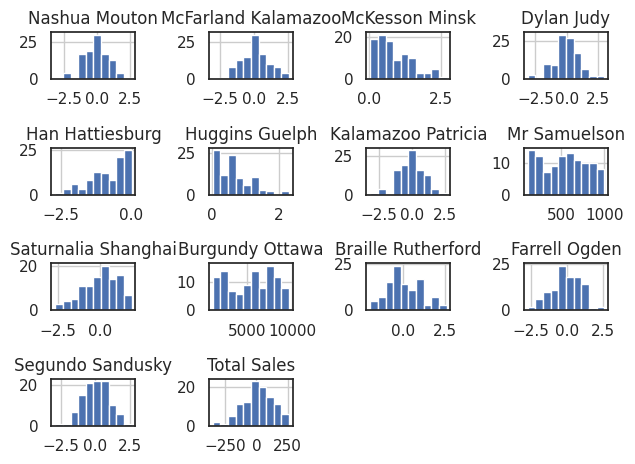

In [ ]:
# plot histograms
import matplotlib.pyplot as plt

AmtSix.hist()
plt.tight_layout();

In [ ]:
# show null values for each variable
AmtSix.isnull().sum()

Nashua Mouton          0
McFarland Kalamazoo    0
McKesson Minsk         5
Dylan Judy             0
Han Hattiesburg        6
Huggins Guelph         9
Kalamazoo Patricia     3
Mr Samuelson           0
Saturnalia Shanghai    0
Burgundy Ottawa        0
Braille Rutherford     0
Farrell Ogden          0
Segundo Sandusky       0
Collar                 0
401K                   0
Medical                0
Stars                  0
Total Sales            0
dtype: int64

In [ ]:
# print info to recall which variables are numeric vs categorical
AmtSix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nashua Mouton        106 non-null    float64
 1   McFarland Kalamazoo  106 non-null    float64
 2   McKesson Minsk       101 non-null    float64
 3   Dylan Judy           106 non-null    float64
 4   Han Hattiesburg      100 non-null    float64
 5   Huggins Guelph       97 non-null     float64
 6   Kalamazoo Patricia   103 non-null    float64
 7   Mr Samuelson         106 non-null    int64  
 8   Saturnalia Shanghai  106 non-null    float64
 9   Burgundy Ottawa      106 non-null    int64  
 10  Braille Rutherford   106 non-null    float64
 11  Farrell Ogden        106 non-null    float64
 12  Segundo Sandusky     106 non-null    float64
 13  Collar               106 non-null    object 
 14  401K                 106 non-null    object 
 15  Medical              106 non-null    obj

In [ ]:
# replace missing data with appropriate mean, median, or mode and confirm with isnull().sum()
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.01-Interpolation-Problem-Statement.html
# https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/
AmtSix['McKesson Minsk'].fillna(round(AmtSix['McKesson Minsk'].mean(), 2), inplace=True)
AmtSix['Kalamazoo Patricia'].fillna(round(AmtSix['Kalamazoo Patricia'].mean(), 2), inplace=True)
AmtSix['Han Hattiesburg'].fillna(round(AmtSix['Han Hattiesburg'].mean(), 2), inplace=True)
AmtSix['Huggins Guelph'].fillna(AmtSix['Huggins Guelph'].median(), inplace=True)
AmtSix.isnull().sum()

Nashua Mouton          0
McFarland Kalamazoo    0
McKesson Minsk         0
Dylan Judy             0
Han Hattiesburg        0
Huggins Guelph         0
Kalamazoo Patricia     0
Mr Samuelson           0
Saturnalia Shanghai    0
Burgundy Ottawa        0
Braille Rutherford     0
Farrell Ogden          0
Segundo Sandusky       0
Collar                 0
401K                   0
Medical                0
Stars                  0
Total Sales            0
dtype: int64

### Train Test Split

Whatever we do with X_train we have to do with X_test but with some considerations:

* if we scale a feature, we fit_transform (train) on X_train and then only transform on X_test
* For things like Variance Inflation Factor, we find the VIF scores for X_train only, but after we decide which features to drop we have to drop from both X_train and X_test

**Important:** We will not be using df (the dataframe we created above) for the remaining code. Instead we will be using X_train for df and X_test when appropriate.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,Y_test = train_test_split(df.drop("Total Sales",axis=1),
                                                 df["Total Sales"],
                                                 test_size = 0.25,
                                                 random_state=42)

print(x_train.shape)
print(X_test.shape)
print(y_train.shape)
print(Y_test.shape)

(79, 20)
(27, 20)
(79,)
(27,)


### Exploratory Data Analysis

In [ ]:
# describe df
x_train.describe()

,Sofia Istanbul,Saturnalia Shanghai,Braille Rutherford,Nashua Mouton,Farrell Ogden,Burgundy Ottawa,Dylan Judy,Segundo Sandusky,McFarland Kalamazoo,Mr Samuelson,Hummel Dominic
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01
mean,0.021304,0.163396,0.015803,-0.006573,0.169835,5693.088608,0.021304,0.118872,0.113853,512.759494,7.000000e-02
std,0.885314,0.946899,0.962070,1.063012,1.048038,2353.392664,0.885314,0.862238,1.107441,249.189312,2.793293e-17
min,-2.081400,-2.436595,-1.951778,-3.446808,-2.153336,1234.000000,-2.081400,-1.456272,-2.669978,114.000000,7.000000e-02
25%,-0.484400,-0.478073,-0.778897,-0.553209,-0.414852,3239.000000,-0.484400,-0.448765,-0.533408,273.000000,7.000000e-02
50%,-0.037200,0.284240,0.098442,-0.058040,0.226383,5988.000000,-0.037200,0.119136,0.150039,515.000000,7.000000e-02
75%,0.570850,0.818108,0.684875,0.518659,0.810194,7494.000000,0.570850,0.639579,0.767766,694.500000,7.000000e-02
max,1.948000,2.219116,2.179480,2.189239,2.219484,9662.000000,1.948000,2.133244,3.302893,996.000000,7.000000e-02


Using X_train.describe(), identify the two features with max values greater than 100. These features have scales that are quite different than the other features and must be scaled so that they share the same scale as the other features. Standardize one feature and Normalize the other feature.

In [ ]:
# standardize feature
from sklearn.preprocessing import StandardScaler

column_scales = ['Mr Samuelson','Burgundy Ottawa']
df['Mr Samuelson'] = (df['Mr Samuelson'] - df['Mr Samuelson'].mean()) / df['Mr Samuelson'].std()
print('standardize column Mr Samuelson is: ',df['Mr Samuelson'].max())
df['Burgundy Ottawa'] = (df['Burgundy Ottawa'] - df['Burgundy Ottawa'].mean()) / df['Burgundy Ottawa'].std()
print('standardize column Burgundy Ottawa is: ',df['Burgundy Ottawa'].max())



standardize column Mr Samuelson is:  1.7922983569593618
standardize column Burgundy Ottawa is:  1.7035522181706906


In [ ]:
# normalize feature
num_columns = x_train.select_dtypes(include=['number'])
x_train = (num_columns - num_columns.min()) / (num_columns.max() - num_columns.min())

x_train


,Sofia Istanbul,Saturnalia Shanghai,Braille Rutherford,Nashua Mouton,Farrell Ogden,Burgundy Ottawa,Dylan Judy,Segundo Sandusky,McFarland Kalamazoo,Mr Samuelson,Hummel Dominic
73,0.381868,1.000000,0.480926,0.572648,0.413932,0.568344,0.381868,0.686039,0.569377,0.611111,NaN
15,0.724798,0.121443,0.246050,0.626236,0.820301,0.661960,0.724798,0.038197,0.366022,0.531746,NaN
77,0.123567,0.387141,0.539515,0.649914,0.427024,0.183318,0.123567,0.056356,0.373099,0.563492,NaN
36,0.188490,0.801596,0.799030,0.640983,0.608493,0.000000,0.188490,0.534919,0.522473,0.123583,NaN
88,0.483943,0.495007,0.378393,0.341183,0.445949,0.511035,0.483943,0.602884,0.153092,0.524943,NaN
...,...,...,...,...,...,...,...,...,...,...,...
71,0.000000,0.493475,0.472371,0.586673,0.546008,0.700285,0.000000,0.294893,0.000000,0.511338,NaN
14,0.593364,0.606881,0.397227,0.884179,0.621586,0.731372,0.593364,0.000000,0.373144,0.888889,NaN
92,0.553234,0.686581,0.110862,0.463563,0.166098,1.000000,0.553234,0.380344,0.318921,0.963719,NaN
51,0.543679,0.407256,0.254474,0.740061,0.498960,0.178927,0.543679,0.131451,0.589750,0.097506,NaN


In [ ]:
# describe data again to verify transformations
x_train.describe()

,Sofia Istanbul,Saturnalia Shanghai,Braille Rutherford,Nashua Mouton,Farrell Ogden,Burgundy Ottawa,Dylan Judy,Segundo Sandusky,McFarland Kalamazoo,Mr Samuelson,Hummel Dominic
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,0.0
mean,0.521840,0.558452,0.476267,0.610399,0.531275,0.529080,0.521840,0.438818,0.466079,0.452108,NaN
std,0.219714,0.203384,0.232876,0.188610,0.239671,0.279235,0.219714,0.240210,0.185412,0.282528,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.396337,0.420671,0.283904,0.513409,0.397566,0.237897,0.396337,0.280681,0.357712,0.180272,NaN
50%,0.507321,0.584408,0.496270,0.601267,0.544207,0.564072,0.507321,0.438892,0.472138,0.454649,NaN
75%,0.658225,0.699077,0.638220,0.703590,0.677716,0.742762,0.658225,0.583881,0.575560,0.658163,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [ ]:
# df.info()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 73 to 102
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sofia Istanbul       79 non-null     float64
 1   Saturnalia Shanghai  79 non-null     float64
 2   Braille Rutherford   79 non-null     float64
 3   Nashua Mouton        79 non-null     float64
 4   Farrell Ogden        79 non-null     float64
 5   Burgundy Ottawa      79 non-null     float64
 6   Dylan Judy           79 non-null     float64
 7   Segundo Sandusky     79 non-null     float64
 8   McFarland Kalamazoo  79 non-null     float64
 9   Mr Samuelson         79 non-null     float64
 10  Hummel Dominic       0 non-null      float64
dtypes: float64(11)
memory usage: 7.4 KB


<function matplotlib.pyplot.show(close=None, block=None)>

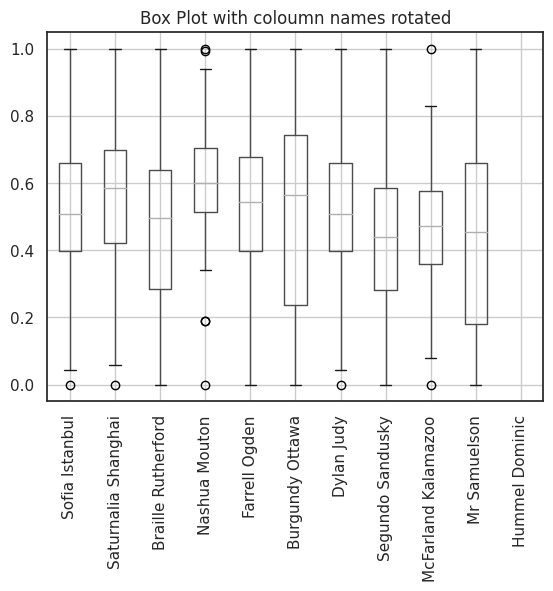

In [ ]:
# check for outliers
x_train.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot with coloumn names rotated')
plt.show

In [ ]:
# vif test
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort vif_data by VIF score in descending order
vif_data_sorted = vif.sort_values(by='VIF', ascending=False)

# Print the sorted DataFrame
print(vif_data_sorted)

               Variable       VIF
1        Sofia Istanbul       inf
7            Dylan Judy       inf
12          Total Sales  2.638435
8      Segundo Sandusky  1.640648
5         Farrell Ogden  1.532146
4         Nashua Mouton  1.362694
3    Braille Rutherford  1.126118
6       Burgundy Ottawa  1.094156
9   McFarland Kalamazoo  1.069562
2   Saturnalia Shanghai  1.053208
10         Mr Samuelson  1.037924
11       Hummel Dominic  0.000036
0                 const  0.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
# delete one of the features out of the pair(s) that show multicollinearity
df = df.drop(columns=['Sofia Istanbul'])

In [ ]:
# verify you no longer have multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_train._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

MissingDataError: ignored

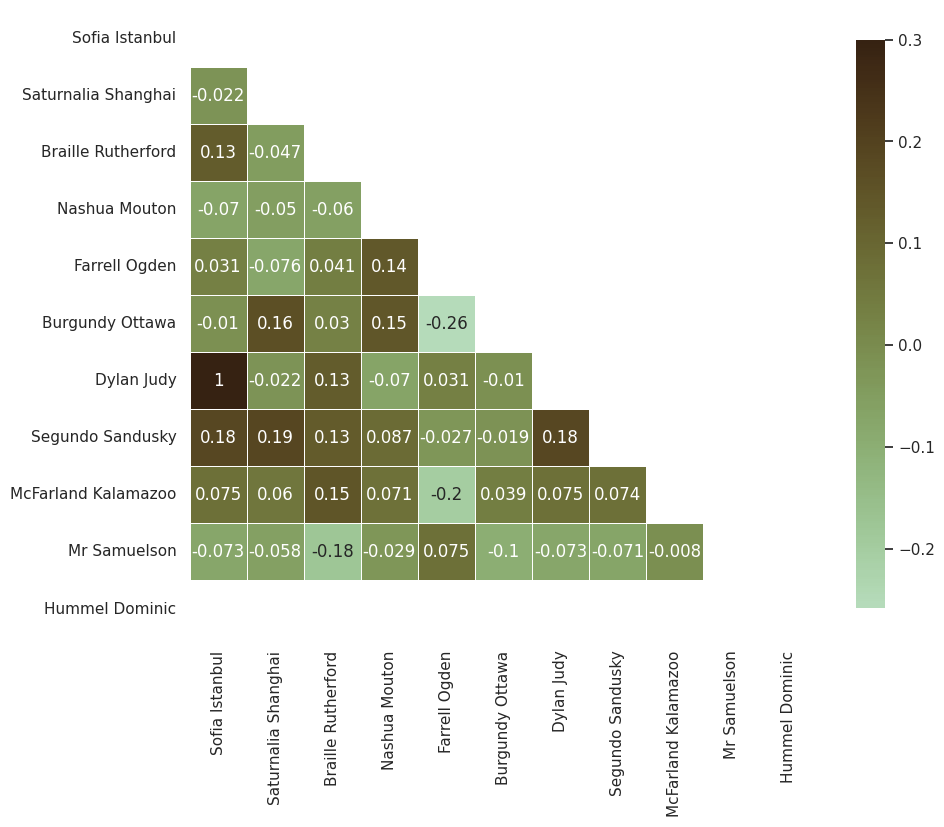

In [ ]:
# show correlation heat map for features, check for multicollinearity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr  = x_train.corr()
# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(10, 12))

# generate a custom diverging colormap
cmap = sns.cubehelix_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

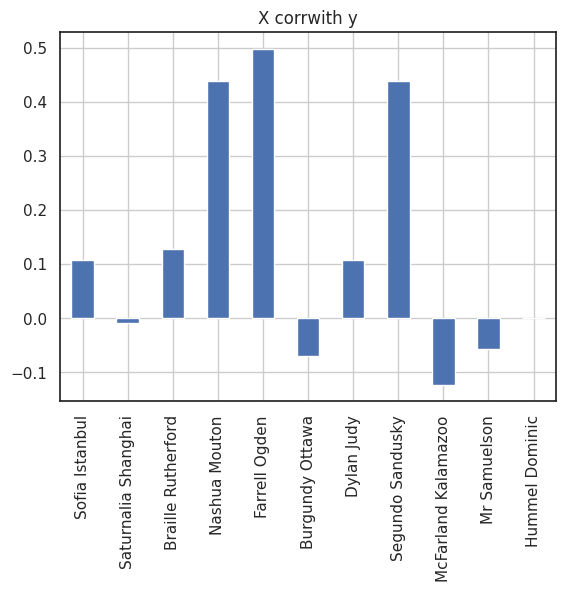

In [ ]:
# correlation with target
x_train.corrwith(y_train).plot.bar(title='X corrwith y', rot=90,grid=True);

In [ ]:
cols = ['Hummel Dominic']
X_test.drop(cols,axis = 1,inplace = True)

KeyError: ignored

In [ ]:
X_test.shape

(27, 19)

In [ ]:
# create and train a Linear Regression model from the sklearn.linear_model library (be sure to only use numeric data - _get_numeric_data() for X_train and X_test)
# make predictions and provide MSE and RSquared scores
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x = x_train._get_numeric_data()
y = y_train._get_numeric_data()
x_tes = X_test._get_numeric_data()
model = LinearRegression()
model.fit(X,Y)

yhat = model.predict(x_test)
print("MSE:",mean_squared_error(Y_test,yhat))
print("RSQUARE:",r2_score(Y_test,yhat))


NameError: ignored

In [ ]:
# create an OLS model from statsmodels and print the summary
import statsmodels.api as sm
# x_train.insert(0, 'const',1)
model = sm.OLS(y ,x).fit()
model.summary()

MissingDataError: ignored

In [ ]:
# create a seaborn pairplot showing the scatter plots of three features with the lowest p-values from the summary above
# include line of best fit and the translucent confidence intervals

import pandas as pd
import seaborn as sns
sns.pairplot(data=pd.concat([x_train, y_train],axis=1),
                               x_vars=['Argonne Harlan','Greece Biggs','Alcestis Aiken'],y_vars = 'Total Sales',
                               kind = 'reg',
                               aspect=0.8,
                               plot_kws ={'line_kws':{'color':'red'},
                                          'scatter_kws':{'alpha':0.5}}
                            );


### Extra Credit

For extra credit, take these three features and get the weights of these features by using np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)) as found in the The DataFrame as a Matrix section of the Module 6 Activity notebook. Then using an f string extract the weights from these variables and print a line equation that resembles the example found in the Linear Algebra section of the Module 6 Activity notebook that reads $h_\theta(x) = \theta_0 + \theta_1x_1 ... \theta_nx_n$

In [ ]:
# code here


### Summary

Share some thoughts on what you have discovered during this analysis